In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
from utils.hmatr import Hmatr
from thresh import ThreshAnalytical
from utils.utils import generate_series, find_Q_hat

from matplotlib import rc
rc('font', weight='bold', size=15)
rc('axes', linewidth=1)

Unable to determine R home: [WinError 2] Не удается найти указанный файл
Unable to determine R library path: Command '('D:\\Program Files\\R\\R-4.1.3\\bin\\Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 1.
R[write to console]: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.1/Rssa_1.0.4.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 2218216 bytes (2.1 MB)

R[write to console]: downloaded 2.1 MB




package 'Rssa' successfully unpacked and MD5 sums checked


R[write to console]: Warning:
R[write to console]:  cannot remove prior installation of package 'Rssa'

R[write to console]: Warning:
R[write to console]:  restored 'Rssa'




The downloaded binary packages are in
	C:\Users\ivank\AppData\Local\Temp\Rtmp4Ge6DN\downloaded_packages


In [69]:
N = 700  # Длина ряда
w1 = 1 / 10  # Начальная частота
Q = 301
r = 2
method = "svd"

w2 = 1/5
C1 = 1
C2 = 2
phi1 = 0
phi2 = np.pi/2
B = 100
T_ = 100
L = 50
noise_sd = 0.5

colors = plt.cm.hsv(np.linspace(0, 1, 10))

# 3

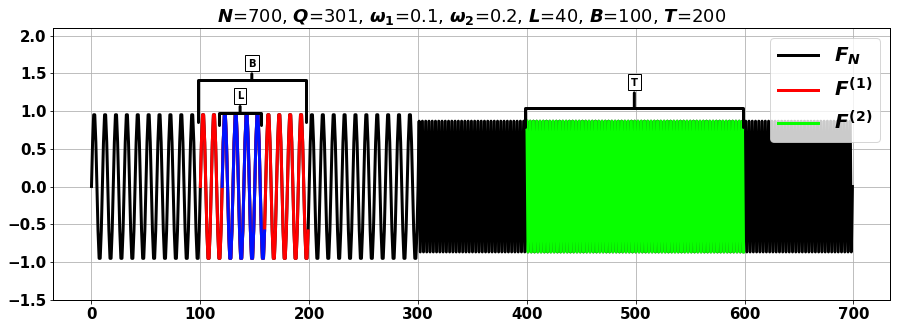

In [75]:
w2 = 1/5

B = 100
T_ = 200
L = 40


original_series = generate_series(w1, 1/3, Q, N)

B_start = 100
X_base = np.arange(B)+B_start
base = original_series[B_start:B_start+B]

T_start = 400
X_test = np.arange(T_)+T_start
test = original_series[T_start:T_start+T_]

L_start = 120
X_l = np.arange(L)+L_start
l_ser = original_series[L_start:L_start+L]

plt.figure(figsize=(15, 5))

plt.annotate('B', xy=(0.237, 0.8), xytext=(0.237, 0.87), xycoords='axes fraction',
            fontsize=10, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=5.4, lengthB=4.2', lw=3.0))

plt.annotate('L', xy=(0.223, 0.68), xytext=(0.223, 0.75), xycoords='axes fraction',
            fontsize=10, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=2.1, lengthB=1.2', lw=3.0))

plt.annotate('T', xy=(0.694, 0.7), xytext=(0.694, 0.8), xycoords='axes fraction',
            fontsize=10, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=10.9, lengthB=1.9', lw=3.0))

plt.rc('legend',fontsize=20, loc='upper right')
plt.plot(original_series, label=r"$F_N$", color='black', linewidth=3)
plt.plot(X_base, base, label=r"$F^{(1)}$", color=colors[0], linewidth=3)
plt.plot(X_test, test, label=r"$F^{(2)}$", color=colors[3], linewidth=3)
plt.plot(X_l, l_ser, color=colors[6], linewidth=3)
plt.title(fr"$N$={N}, $Q$={Q}, $\omega_1$={w1}, $\omega_2$={w2}, $L$={L}, $B$={B}, $T$={T_}")
plt.legend()
plt.legend()
plt.ylim((-1.5, 2.1))
plt.grid()
plt.show()
# designations.png

# 6

In [70]:
seriesPermanent = lambda n: C1*np.sin(2*np.pi*w1*n + phi1) if n < Q-1 else C1*np.sin(2*np.pi*w2*n + phi1)
seriesTemporary = lambda n: C1*np.sin(2*np.pi*w1*n + phi1) if n < Q-1 else C2*np.sin(2*np.pi*w1*n + phi1)
seriesShifted = lambda n: C1*np.sin(2*np.pi*w1*n + phi1) if n < Q-1 else C1*np.sin(2*np.pi*w1*n + phi2)
seriesOutlier = lambda n: C1*np.sin(2*np.pi*w1*n + phi1)

fPerm = [seriesPermanent(i) for i in range(N)]
hmPerm = Hmatr(fPerm, B, T_, L, neig=r, svdMethod=method)

fTemp = [seriesTemporary(i) for i in range(N)]
hmTemp = Hmatr(fTemp, B, T_, L, neig=r, svdMethod=method)

fShifted = [seriesShifted(i) for i in range(N)]
hmShifted = Hmatr(fShifted, B, T_, L, neig=r, svdMethod=method)

fOutlier = [seriesOutlier(i) for i in range(N)]
fOutlier[Q] = fOutlier[Q] + C1*10
hmOutlier = Hmatr(fOutlier, B, T_, L, neig=r, svdMethod=method)

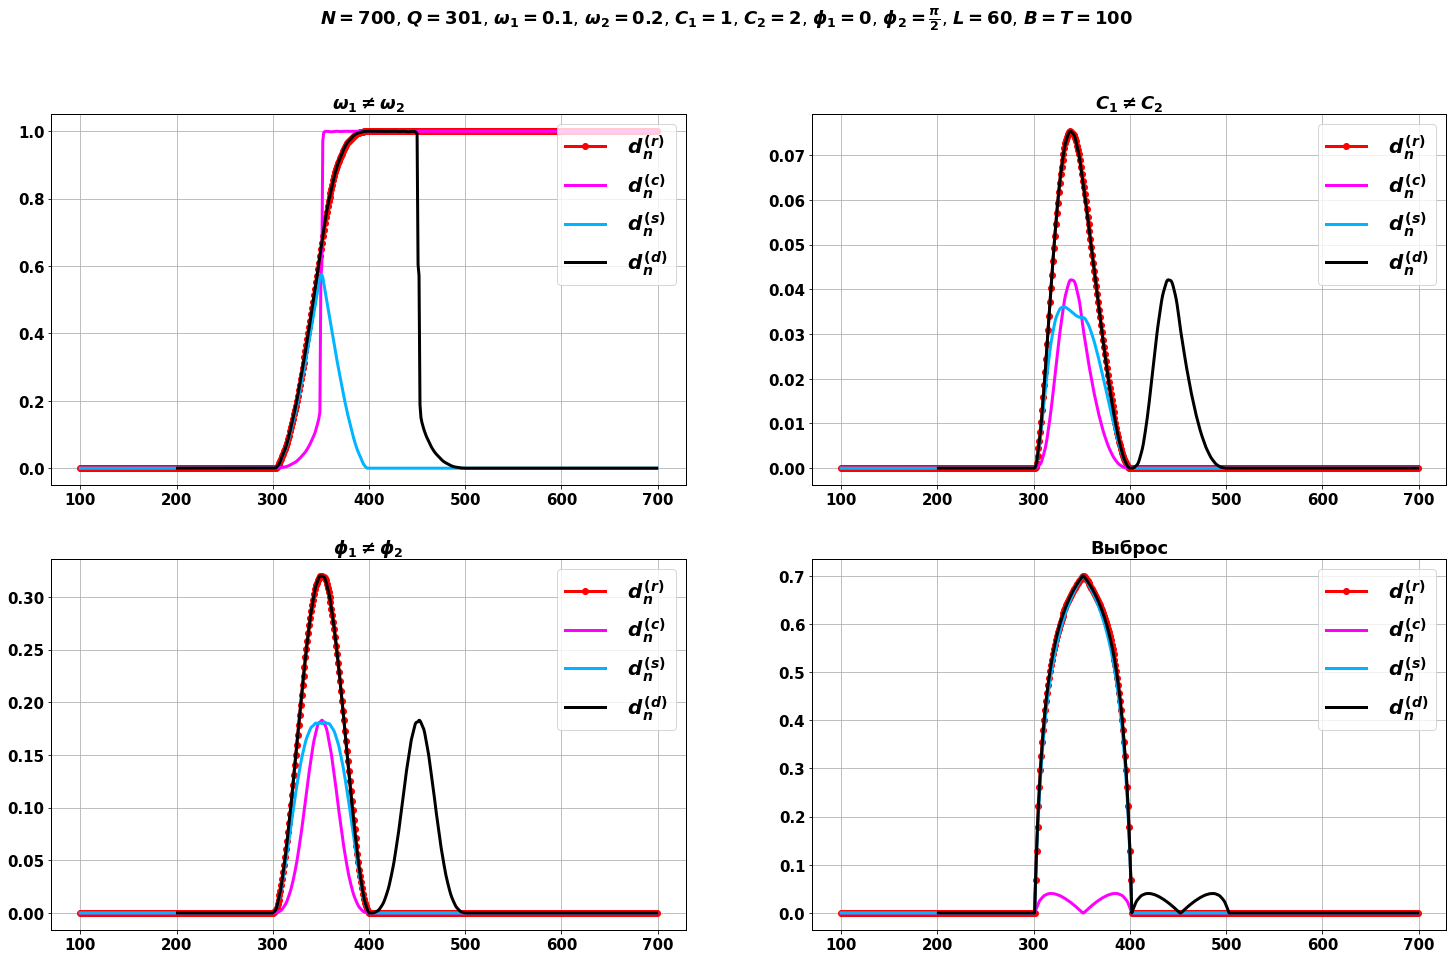

In [77]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(25, 15))
fig.suptitle(r"$N=700$, $Q=301$, $\omega_1=0.1$, $\omega_2=0.2$, $C_1=1$, $C_2=2$, $\phi_1=0$, $\phi_2=\frac{\pi}{2}$, $L=60$, $B=T=100$")

ax1.set_title(r'$\omega_1 \neq \omega_2$', fontweight='bold')
ax1.plot(np.arange(hmPerm.T, hmPerm.N), hmPerm.getRow(0), label=r' $d_n^{(r)} $', color=colors[0], marker='o', linewidth=3)
ax1.plot(np.arange(hmPerm.B, hmPerm.N), hmPerm.getCol(0), label=r' $d_n^{(c)} $', color='fuchsia', linewidth=3)
ax1.plot(np.arange(hmPerm.T, hmPerm.N), hmPerm.getSym(), label=r' $d_n^{(s)} $', color=colors[5], linewidth=3)
ax1.plot(np.arange(hmPerm.B + hmPerm.T + 1, hmPerm.N), hmPerm.getDiag(), label=r' $d_n^{(d)} $', color='black', linewidth=3)
ax1.legend()
ax1.grid()

ax2.set_title(r'$C_1 \neq C_2$', fontweight='bold')
ax2.plot(np.arange(hmTemp.T, hmTemp.N), hmTemp.getRow(0), label=r' $d_n^{(r)} $', color=colors[0], marker='o', linewidth=3)
ax2.plot(np.arange(hmTemp.B, hmTemp.N), hmTemp.getCol(0), label=r' $d_n^{(c)} $', color='fuchsia', linewidth=3)
ax2.plot(np.arange(hmTemp.T, hmTemp.N), hmTemp.getSym(), label=r' $d_n^{(s)} $', color=colors[5], linewidth=3)
ax2.plot(np.arange(hmTemp.B + hmTemp.T + 1, hmTemp.N), hmTemp.getDiag(), label=r' $d_n^{(d)} $', color='black', linewidth=3)
ax2.legend()
ax2.grid()

ax3.set_title(r'$\phi_1 \neq \phi_2$', fontweight='bold')
ax3.plot(np.arange(hmShifted.T, hmShifted.N), hmShifted.getRow(0), label=r' $d_n^{(r)} $', color=colors[0], marker='o', linewidth=3)
ax3.plot(np.arange(hmShifted.B, hmShifted.N), hmShifted.getCol(0), label=r' $d_n^{(c)} $', color='fuchsia', linewidth=3)
ax3.plot(np.arange(hmShifted.T, hmShifted.N), hmShifted.getSym(), label=r' $d_n^{(s)} $', color=colors[5], linewidth=3)
ax3.plot(np.arange(hmShifted.B + hmShifted.T + 1, hmShifted.N), hmShifted.getDiag(), label=r' $d_n^{(d)} $', color='black', linewidth=3)
ax3.legend()
ax3.grid()

ax4.set_title('Выброс', fontweight='bold')
ax4.plot(np.arange(hmOutlier.T, hmOutlier.N), hmOutlier.getRow(0), label=r' $d_n^{(r)} $', color=colors[0], marker='o', linewidth=3)
ax4.plot(np.arange(hmOutlier.B, hmOutlier.N), hmOutlier.getCol(0), label=r' $d_n^{(c)} $', color='fuchsia', linewidth=3)
ax4.plot(np.arange(hmOutlier.T, hmOutlier.N), hmOutlier.getSym(), label=r' $d_n^{(s)} $', color=colors[5], linewidth=3)
ax4.plot(np.arange(hmOutlier.B + hmOutlier.T + 1, hmOutlier.N), hmOutlier.getDiag(), label=r' $d_n^{(d)} $', color='black', linewidth=3)
ax4.legend()
ax4.grid()
# detectionTests.png

# 7

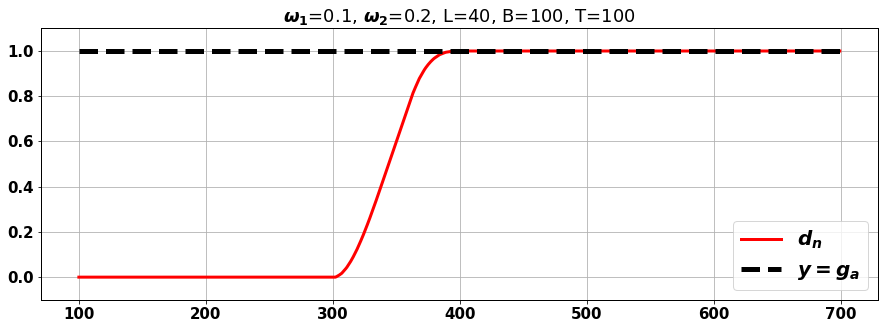

In [88]:
T_ = 100
original_series = generate_series(w1, 1/3, Q, N)
row1 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()
g_analytical = ThreshAnalytical(w1, w2, L, T_, 30, 0).value_after_heterogeneity
colors = plt.cm.hsv(np.linspace(0, 1, 7))
X = np.arange(T_, N)
plt.figure(figsize=(15, 5))
plt.plot(X, row1, label=r'$d_n$', color=colors[0], linewidth=3)
plt.plot(X, [g_analytical]*len(row1), "--", label=r'$y = g_a$', color="black", linewidth=5)


plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, L={L}, B={B}, T={T_}")
plt.legend(loc='lower right')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# example_approx.png

# 8

In [91]:
from utils.hmatrStatistics import Hmatr as HmatrS

def generate_gs_comparsion_omegas():
    w1 = 1/10
    w2 = 1/np.arange(10, 20, 0.2)

    gs_a = []
    gs_c = []

    for i in range(len(w2)):
        f = generate_series(w1, w2[i], N=N, Q=Q)
        hm = HmatrS(f, 100, 100, 60, neig=r, svdMethod=method)
        gs_c.append(hm.compute_single_row(0)[-1])
        gs_a.append(hm.compute_single_val_analytical(w1, w2[i], verbose=False))
    return w1, w2, gs_a, gs_c

def generate_gs_comparsion_Ls():
    w1 = 1/10
    w2 = 11/100
    B = 200
    T_ = 200
    L = np.arange(10, 100, 1, dtype=int)
    f = generate_series(w1, w2, N=N, Q=Q)
    hm = HmatrS(f, B, T_, 20, neig=r, svdMethod=method)

    gs_a = []
    gs_c = []

    for i in range(len(L)):
#         hm = Hmatr(f, B, T_, L[i], neig=r, svdMethod=method)
        gs_c.append(hm.compute_single_row(0, L[i])[-1])
        gs_a.append(hm.compute_single_val_analytical(w1, w2, verbose=False))
    return L, gs_a, gs_c


w1_, w2_, gs_a, gs_c = generate_gs_comparsion_omegas()
L_, gs_a_1, gs_c_1 = generate_gs_comparsion_Ls()

R[write to console]: Warning:
R[write to console]:  package 'Rssa' is in use and will not be installed



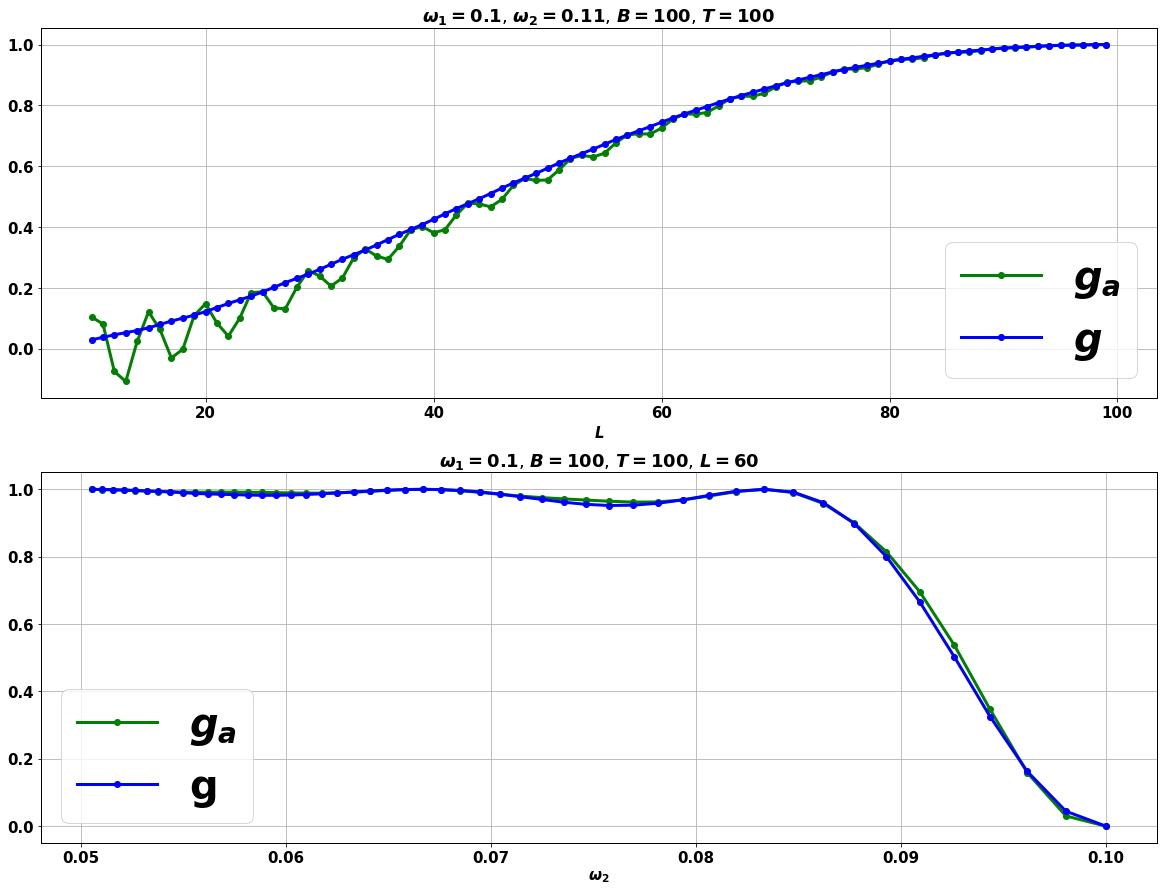

In [104]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20, 15))
plt.rc('legend',fontsize=40)
ax1.set_title(fr"$\omega_1=0.1$, $\omega_2=0.11$, $B=100$, $T=100$")
ax1.set_xlabel(r"$L$")
ax1.grid()
ax1.plot(L_, gs_a_1, marker="o", color="g", label=r"$g_a$", linewidth=3)
ax1.plot(L_, gs_c_1, marker="o", color="b", label="$g$", linewidth=3)
ax1.legend(loc = "lower right")

ax2.set_title(rf"$\omega_1=0.1$, $B=100$, $T=100$, $L=60$")
ax2.set_xlabel(r"$\omega_2$")
ax2.grid()
ax2.plot(w2_, gs_a, marker="o", color="g", label="$g_a$", linewidth=3)
ax2.plot(w2_, gs_c, marker="o", color="b", label="g", linewidth=3)
ax2.legend(loc = "lower left")
# approxCorrectness.png

# 9

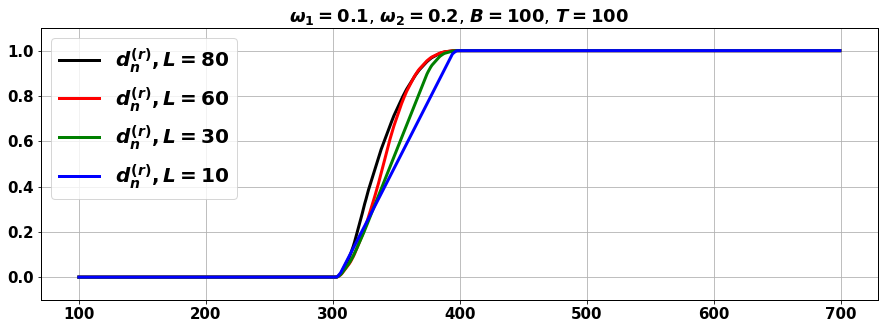

In [113]:
original_series = generate_series(w1, w2, Q, N)
row1 = Hmatr(f=original_series, B=B, T=T_, L=10, neig=r, svdMethod=method).getRow()
row2 = Hmatr(f=original_series, B=B, T=T_, L=30, neig=r, svdMethod=method).getRow()
row3 = Hmatr(f=original_series, B=B, T=T_, L=60, neig=r, svdMethod=method).getRow()
row4 = Hmatr(f=original_series, B=B, T=T_, L=80, neig=r, svdMethod=method).getRow()

X = np.arange(T_, N)

plt.rc('legend',fontsize=20)
plt.figure(figsize=(15, 5))
plt.plot(X, row4, label=r'$d_{n}^{(r)}, L=80$', color="black", linewidth=3)
plt.plot(X, row3, label=r'$d_{n}^{(r)}, L=60$', color="r", linewidth=3)
plt.plot(X, row2, label=r'$d_{n}^{(r)}, L=30$', color="g", linewidth=3)
plt.plot(X, row1, label=r'$d_{n}^{(r)}, L=10$', color="b", linewidth=3)
plt.title(fr"$\omega_1=0.1$, $\omega_2=0.2$, $B=100$, $T=100$")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# row_linear_growth.png

# 10

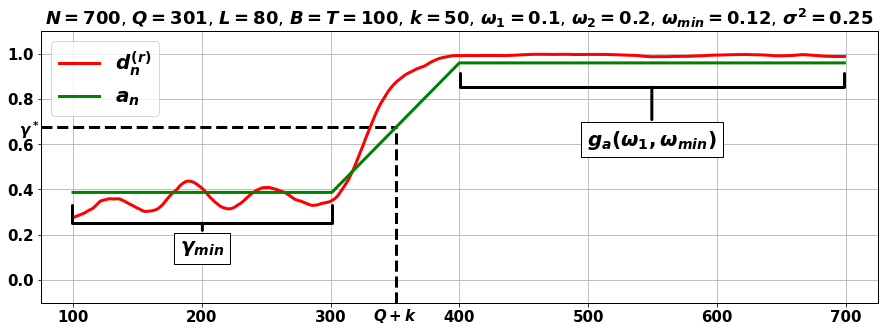

In [178]:
noise_sd = 0.5
np.random.seed(12345)
w_min = w1 + 1/50  # Минимальная разница в частотах для обнаружения неоднородности
k = 50  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 0.2

B = 100
T_ = 100
L = 80

original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

# Generate analytical approximation to row function
initial_value = np.quantile(row[:Q-T_], 0.75)
g_analytical = ThreshAnalytical(w1, w_min, L, T_, k, initial_value)


approx = [initial_value for i in range(Q-B)]
approx = [*approx, *g_analytical.transition_interval.tolist()]
approx = [*approx, *[g_analytical.value_after_heterogeneity for i in range(len(row) - len(approx))]]
Q_hat = find_Q_hat(row, g_analytical.thresh)

perpendicular = [331]* round(g_analytical.thresh * 100)


w_min_str = r'$\omega_{min}$'

X = np.arange(B, N)
plt.figure(figsize=(15, 5))
plt.plot([Q + k]*round(g_analytical.thresh * 100), np.linspace(-0.1, g_analytical.thresh, round(g_analytical.thresh * 100)), '--', color='black', linewidth=3)
plt.plot(np.linspace(50, Q + k, 200), [g_analytical.thresh] * 200, '--', color='black', linewidth=3)
plt.plot(X, row, label=r'$d_{n}^{(r)}$', color='r', linewidth=3)
plt.plot(X, approx, label=r'$a_{n}}$', color='g', linewidth=3)
plt.text(x=58, y=g_analytical.thresh - 0.04, s=r"$\gamma^*$")
plt.text(x=333, y=-0.18, s=r"$Q + k$")

plt.annotate(r'$\gamma_{min}$', xy=(0.193, 0.3), xytext=(0.193, 0.2), xycoords='axes fraction',
            fontsize=20, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=6.5, lengthB=0.9', lw=3.0))

plt.annotate(r'$g_{a}(\omega_1, \omega_{min})$', xy=(0.73, 0.8), xytext=(0.73, 0.6), xycoords='axes fraction',
            fontsize=20, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=9.6, lengthB=0.7', lw=3.0))

plt.title(r"$N=700$, $Q=301$, $L=80$, $B=T=100$, $k=50$, $\omega_1=0.1$, $\omega_2=0.2$, $\omega_{min}=0.12$, $\sigma^2=0.25$")
plt.legend(loc='upper left')
plt.xlim((75, 725))
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# example_system_work.png

# 12

## T-L = 10

In [193]:
# w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
w_min = 1/5  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5
T = 70
L = 60
iter_num = 200

In [194]:
def modelling_series(t):
    if t is None:
        t = T_
    np.random.seed(12345)
    rows = []
    time_start = time.time()
    for i in tqdm(range(iter_num)):
        original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
        rows.append(Hmatr(f=original_series, B=B, T=t, L=L, neig=r, svdMethod=method).getRow())
    print(f"Modelling took {round(time.time() - time_start, 4)} s")
    return rows

def calc_probs(modelled_rows, threshes = np.arange(0, 1.01, 0.01)):
    fpr = []  # Детекции раньше настоящего момента возмущения
    tpr = []  # Детекции в или позже момента возмущения, но не позже момента k
    fnr = []  # Детекции позже момента k

    Q_hats = []
    for thresh in threshes:
        fp = 0
        tp = 0
        fn = 0
        for row in modelled_rows:
            Q_hat = find_Q_hat(row, thresh)
            Q_hats.append(Q_hat)
            if Q_hat is None:
                # Не превзошли порог, пропускаем значение. При подсчете долей кривые будут уходить в 0
                fn += 1
                continue
            Q_hat += T
            if Q_hat < Q:
                fp += 1
            if Q <= Q_hat <= Q + k:
                tp += 1
            if Q_hat > Q+k:
                fn += 1
        fpr.append(round(fp/iter_num, 4))
        tpr.append(round(tp/iter_num, 4))
        fnr.append(round(fn/iter_num, 4))

    mean_thresh = []
    for row in modelled_rows:
        initial_value = np.quantile(row[:Q-T], 0.75)
        g_analytical = ThreshAnalytical(w1, w_min, L, T, k, initial_value)
        mean_thresh.append(g_analytical.thresh)
    mean_thresh = np.mean(mean_thresh)
    return fpr, tpr, fnr, mean_thresh

In [195]:
np.random.seed(12345)
modelled_rows = modelling_series(T)
fpr, tpr, fnr, mean_thresh = calc_probs(modelled_rows)

C:\Users\ivank\AppData\Local\Temp\ipykernel_12200\2772329623.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(iter_num)):


  0%|          | 0/200 [00:00<?, ?it/s]

Modelling took 237.3513 s


In [219]:
T=70
row = modelled_rows[0]
initial_value = np.quantile(row[:Q-T], 0.75)
g_analytical = ThreshAnalytical(w1, w_min, L, T_, k, initial_value)
Q_hat_correct = find_Q_hat(row, g_analytical.thresh)
approx_correct = [initial_value for i in range(Q-T)]
approx_correct = [*approx_correct, *g_analytical.transition_interval.tolist()]
approx_correct = [*approx_correct, *[g_analytical.value_after_heterogeneity for i in range(len(row) - len(approx_correct))]]

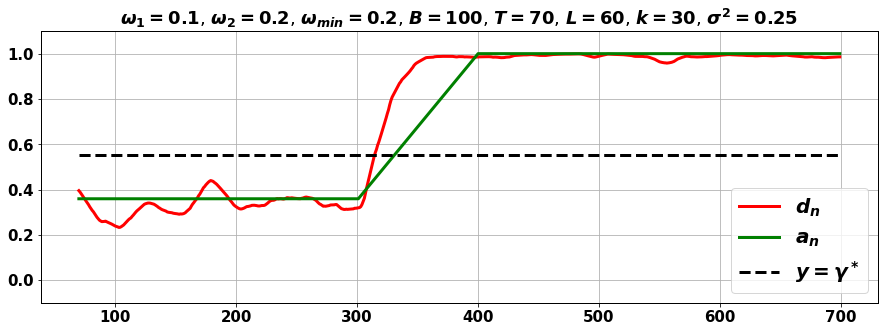

In [220]:
X = np.arange(T, len(row)+T)
plt.figure(figsize=(15, 5))
plt.plot(X, row, label=r'$d_n$', linewidth=3, color='r')
plt.plot(X, approx_correct, label=r'$a_n$', linewidth=3, color='g')
plt.plot(np.arange(T, N), [g_analytical.thresh]*len(row), '--', label=r'$y=\gamma^*$', linewidth=3, color='black')
plt.title(r"$\omega_1=0.1$, $\omega_2=0.2$, $\omega_{min}=0.2$, $B=100$, $T=70$, $L=60$, $k=30$, $\sigma^2=0.25$")
plt.ylim((-0.1, 1.1))
plt.grid()
plt.legend(loc='lower right')
# system_estimation_one_iter_t=70
plt.savefig("../presentation/imgs/system_estimation_one_iter_t=70.png")

C:\Users\ivank\AppData\Local\Temp\ipykernel_12200\226931248.py:7: RuntimeWarning: invalid value encountered in true_divide
  values = np.array(tpr/(1-np.array(fpr)))


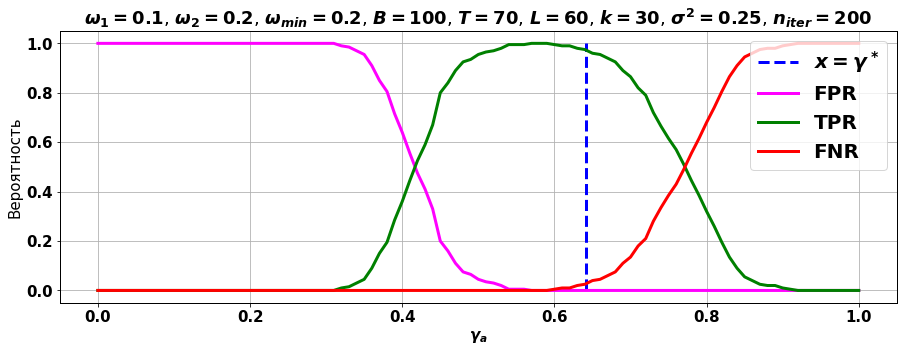

In [204]:
threshes = np.arange(0, 1.01, 0.01)

plt.figure(figsize=(15, 5))
plt.plot([mean_thresh]*len(threshes), threshes, '--', label=r'$x=\gamma^*$', linewidth=3, color='b')
plt.plot(threshes, fpr, label='FPR', linewidth=3, color='fuchsia')

values = np.array(tpr/(1-np.array(fpr)))
idxs = np.invert(np.isnan(values))
values = values[idxs]


plt.plot(threshes, tpr, label='TPR', linewidth=3, color='g')
plt.plot(threshes, fnr, label='FNR', linewidth=3, color='r')
plt.title(r"$\omega_1=0.1$, $\omega_2=0.2$, $\omega_{min}=0.2$, $B=100$, $T=70$, $L=60$, $k=30$, $\sigma^2=0.25$, $n_{iter}=200$")
plt.xlabel(r'$\gamma_a$')
plt.ylabel('Вероятность')
plt.legend()
plt.grid()
plt.savefig("../presentation/imgs/system_estimation_t=70.png")

In [222]:
mean_thresh

0.6413548379921084

In [223]:
tpr[64]

0.975

## T-L = 70

In [206]:
T=130
np.random.seed(12345)
modelled_rows_1 = modelling_series(T)
fpr_1, tpr_1, fnr_1, mean_thresh_1 = calc_probs(modelled_rows_1)

C:\Users\ivank\AppData\Local\Temp\ipykernel_12200\2772329623.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(iter_num)):


  0%|          | 0/200 [00:00<?, ?it/s]

Modelling took 231.9616 s


In [208]:
row = modelled_rows_1[0]
initial_value = np.quantile(row[:Q-T], 0.75)
g_analytical = ThreshAnalytical(w1, w_min, L, T_, k, initial_value)
Q_hat_correct = find_Q_hat(row, g_analytical.thresh)
approx_correct = [initial_value for i in range(Q-T)]
approx_correct = [*approx_correct, *g_analytical.transition_interval.tolist()]
approx_correct = [*approx_correct, *[g_analytical.value_after_heterogeneity for i in range(len(row) - len(approx_correct))]]

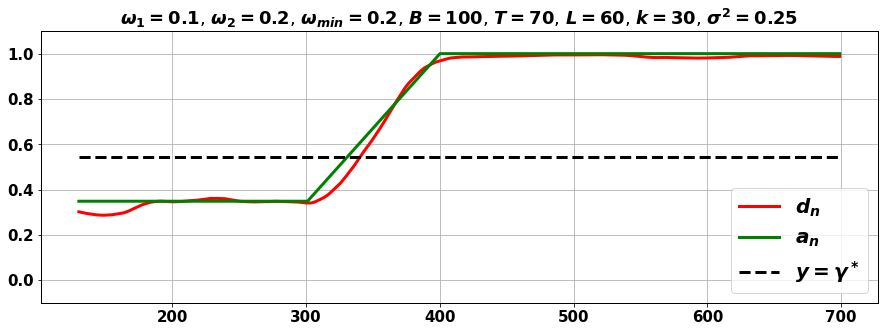

In [212]:
X = np.arange(T, len(row)+T)
plt.figure(figsize=(15, 5))
plt.plot(X, row, label=r'$d_n$', linewidth=3, color='r')
plt.plot(X, approx_correct, label=r'$a_n$', linewidth=3, color='g')
plt.plot(np.arange(T, N), [g_analytical.thresh]*len(row), '--', label=r'$y=\gamma^*$', linewidth=3, color='black')
plt.title(r"$\omega_1=0.1$, $\omega_2=0.2$, $\omega_{min}=0.2$, $B=100$, $T=70$, $L=60$, $k=30$, $\sigma^2=0.25$")
plt.ylim((-0.1, 1.1))
plt.grid()
plt.legend(loc='lower right')
# system_estimation_one_iter_t=70
plt.savefig("../presentation/imgs/system_estimation_one_iter_t=130.png")

C:\Users\ivank\AppData\Local\Temp\ipykernel_12200\1775622919.py:7: RuntimeWarning: invalid value encountered in true_divide
  values = np.array(tpr_1/(1-np.array(fpr_1)))


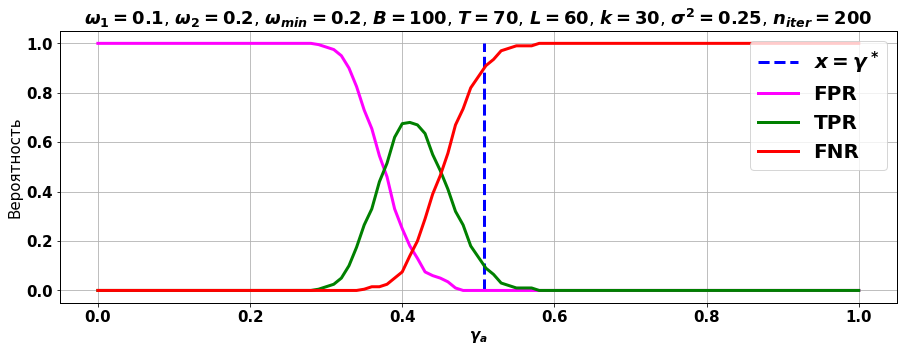

In [225]:
threshes = np.arange(0, 1.01, 0.01)

plt.figure(figsize=(15, 5))
plt.plot([mean_thresh_1]*len(threshes), threshes, '--', label=r'$x=\gamma^*$', linewidth=3, color='b')
plt.plot(threshes, fpr_1, label='FPR', linewidth=3, color='fuchsia')

values = np.array(tpr_1/(1-np.array(fpr_1)))
idxs = np.invert(np.isnan(values))
values = values[idxs]


plt.plot(threshes, tpr_1, label='TPR', linewidth=3, color='g')
plt.plot(threshes, fnr_1, label='FNR', linewidth=3, color='r')

plt.title(r"$\omega_1=0.1$, $\omega_2=0.2$, $\omega_{min}=0.2$, $B=100$, $T=70$, $L=60$, $k=30$, $\sigma^2=0.25$, $n_{iter}=200$")
plt.xlabel(r'$\gamma_a$')
plt.ylabel('Вероятность')
plt.legend()
plt.grid()

plt.savefig("../presentation/imgs/system_estimation_t=130.png")

In [227]:
mean_thresh_1

0.5068389960234686

In [231]:
fnr_1[50]

0.865